In [19]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import reuters

(X_train, y_train),(X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2) # num_words 빈도 수 num_words 이상 반복되는 단어
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8982,) (8982,) (2246,) (2246,)


In [3]:
print(np.unique(y_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [4]:
category = len(np.unique(y_train))
print(category, '카테고리')

46 카테고리


In [5]:
X_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
# X_train 학습용 기사, y_train 뉴스의 카테고리(46개 존재) Tokenizing이 끝난 상태
# 각 기사의 단어 수를 맞추기 위해 padding
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [7]:
print(X_train.shape)

(8982, 100)


In [8]:
# y_train -> one-hot encoding
# from tensorflow.keras.utils import to_categorical
# y = to_categorical(y_train)
# 카테고리가 믾아 (46개) 원핫 인코딩 안함

In [9]:
model = Sequential()
model.add(Embedding(1000, 100))             # 1000, 기사당 단어 수 100
model.add(LSTM(100, activation='tanh'))     # LSTM로 RNN 구현
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
earlstop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test, y_test), callbacks=[earlstop])

Epoch 1/200
450/450 [==============================] - 27s 54ms/step - loss: 2.1457 - accuracy: 0.4690 - val_loss: 1.8570 - val_accuracy: 0.5561
Epoch 2/200
450/450 [==============================] - 25s 55ms/step - loss: 1.7629 - accuracy: 0.5521 - val_loss: 1.7288 - val_accuracy: 0.5579
Epoch 3/200
450/450 [==============================] - 24s 53ms/step - loss: 1.6327 - accuracy: 0.5819 - val_loss: 1.5897 - val_accuracy: 0.6042
Epoch 4/200
450/450 [==============================] - 23s 52ms/step - loss: 1.4644 - accuracy: 0.6278 - val_loss: 1.4636 - val_accuracy: 0.6220
Epoch 5/200
450/450 [==============================] - 24s 54ms/step - loss: 1.3039 - accuracy: 0.6679 - val_loss: 1.3367 - val_accuracy: 0.6638
Epoch 6/200
450/450 [==============================] - 24s 53ms/step - loss: 1.1810 - accuracy: 0.6993 - val_loss: 1.2744 - val_accuracy: 0.6808
Epoch 7/200
450/450 [==============================] - 24s 54ms/step - loss: 1.0688 - accuracy: 0.7303 - val_loss: 1.2078 - val_ac

In [11]:
print('test 데이터의 정확도 :', model.evaluate(X_test, y_test)[1])

71/71 [==============================] - 2s 24ms/step - loss: 1.1764 - accuracy: 0.7266
test 데이터의 정확도 : 0.7266250848770142


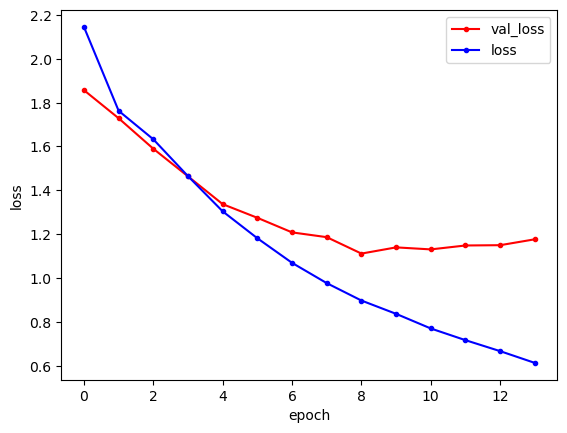

In [12]:
# 학습 셋과 테스트 셋의 오차 그래프로 확인
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='val_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [18]:
test_news = ['중부지방은 대체로 맑으나 남부 지방은 구름이 많겠습니다',
            '이번 선거에는 누가 이길 수 있을까?',
            '올 초부터 유동성의 힘으로 주가가 일정하게 상승']
token =Tokenizer()
token.fit_on_texts(test_news)
pre_news = token.texts_to_sequences(test_news)

[np.argmax(line) for line in model.predict(sequence.pad_sequences(pre_news, maxlen=100))]

1/1 [==============================] - 0s 31ms/step


[26, 44, 34]

## LSTM과 CNN 조합을 이용한 영화 리뷰 분류

In [21]:
from tensorflow.keras.datasets import imdb

(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=5000) # num_words 빈도 수 num_words 이상 반복되는 단어
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

17464789/17464789 [==============================] - 1s 0us/step
(25000,) (25000,) (25000,) (25000,)


In [22]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [23]:
model = Sequential()
model.add(Embedding(5000, 100))         # 단어 Embadding
model.add(Conv1D(64, 4, padding='valid', activation='relu', strides=1))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 conv1d (Conv1D)             (None, None, 64)          25664     
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [24]:
# 모델 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=100, batch_size=40, validation_split=0.25, callbacks=[early_stop])

Epoch 1/100
469/469 [==============================] - 75s 153ms/step - loss: 0.3900 - accuracy: 0.8135 - val_loss: 0.2921 - val_accuracy: 0.8893
Epoch 2/100
469/469 [==============================] - 72s 154ms/step - loss: 0.2322 - accuracy: 0.9098 - val_loss: 0.2711 - val_accuracy: 0.8867
Epoch 3/100
469/469 [==============================] - 72s 155ms/step - loss: 0.1743 - accuracy: 0.9364 - val_loss: 0.3018 - val_accuracy: 0.8802
Epoch 4/100
469/469 [==============================] - 72s 154ms/step - loss: 0.1283 - accuracy: 0.9554 - val_loss: 0.2998 - val_accuracy: 0.8842
Epoch 5/100
469/469 [==============================] - 71s 150ms/step - loss: 0.1009 - accuracy: 0.9663 - val_loss: 0.3365 - val_accuracy: 0.8781
Epoch 6/100
469/469 [==============================] - 73s 156ms/step - loss: 0.0688 - accuracy: 0.9781 - val_loss: 0.4157 - val_accuracy: 0.8803
Epoch 7/100
469/469 [==============================] - 73s 155ms/step - loss: 0.0559 - accuracy: 0.9823 - val_loss: 0.4808 -

In [25]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 33s 42ms/step - loss: 0.5327 - accuracy: 0.8518


[0.532656729221344, 0.8518000245094299]

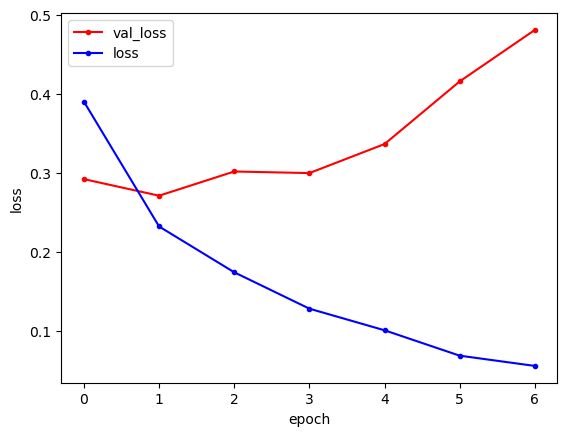

In [26]:
# 학습 셋과 테스트 셋의 오차 그래프로 확인
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='val_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()